# Biblioteka Seaborn

Seaborn to biblioteka wykorzystywana do statystycznych wizualizacji danych. Została zbudowana na bazie biblioteki matplotlib i jednocześnie została zintegrowana do struktur danych udostępnianych przez bibliotekę pandas. 

In [1]:
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.genfromtxt('athlete_events_np.csv',
                     delimiter=';',
                     dtype=[
                         ('ID', 'i4'),
                         ('Name', 'U100'),
                         ('Sex', 'U1'),
                         ('Age', 'f4'),
                         ('Height', 'f4'),
                         ('Weight', 'f4'),
                         ('Team', 'U100'),
                         ('NOC', 'U3'),
                         ('Games', 'U100'),
                         ('Year', 'i4'),
                         ('Season', 'U100'),
                         ('City', 'U100'),
                         ('Sport', 'U100'),
                         ('Event', 'U100'),
                         ('Medal', 'U100')
                     ], names=True)
df = pd.DataFrame(data)

--------------------
### Wykresy relacyjne

Wykresy relacyjne przedstawiają relacje pomiędzy danymi. Funkcja `relplot` znajduje się na poziomie *figure* (poziom wyższy) i korzysta z funkcji z poziomu *axes* (poziom niższy): `scatterplot` oraz `lineplot`. Do wizualizacji danych można wykorzystywać wszystkie powyższe funkcje z odpowiednimi parametrami.

##### ⭐ Zadanie 1: 

Przygotuj wykres punktowy (`scatterplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Zapoznaj się z funkcjami `set_theme` i `set_style` oraz ich parametrami. Wykorzystaj je, żeby dostosować wygląd swojego wykresu. Zadbaj o czytelność wykresu (tytuł wykresu i podpisy osi). 

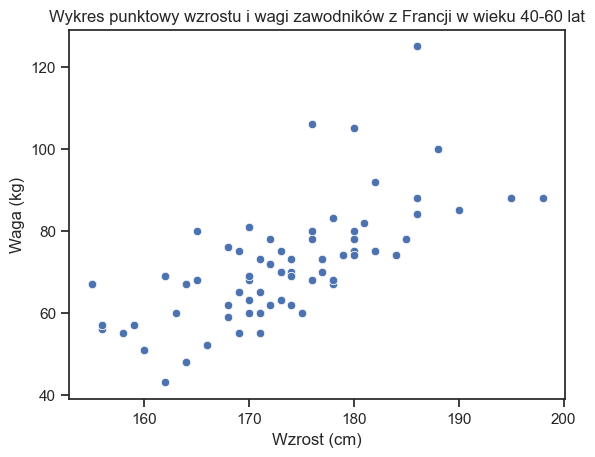

In [19]:
height_weight_data_france = df[df['Team'] == 'France'][['Height', 'Weight', 'Age']].dropna() # Filtruj dane dla zawodników z Francji, wybierz kolumny Height i Weight, usuń wiersze z brakującymi danymi

height_weight_data_france_filtered = height_weight_data_france[(height_weight_data_france['Age'] >= 40) & (height_weight_data_france['Age'] <= 60)] # Ograniczenie do zawodników w wieku 40-60 lat

sns.scatterplot(x='Height', y='Weight', data=height_weight_data_france_filtered)
sns.set_style("whitegrid") # Ustawienie stylu wykresu, inna opcja to "darkgrid"
sns.set_theme(style="ticks") # Ustawienie motywu wykresu, inna opcja to "dark"

plt.title('Wykres punktowy wzrostu i wagi zawodników z Francji w wieku 40-60 lat')
plt.xlabel('Wzrost (cm)')
plt.ylabel('Waga (kg)')

plt.show()

##### ⭐ Zadanie 2:

Przygotuj wykres liniowy (`lineplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 serie danych. Zapoznaj się z parametrem `hue` oraz dobierz dla niego właściwą wartość mając na uwadze wizualizację określonej liczby serii danych. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi i legenda). 

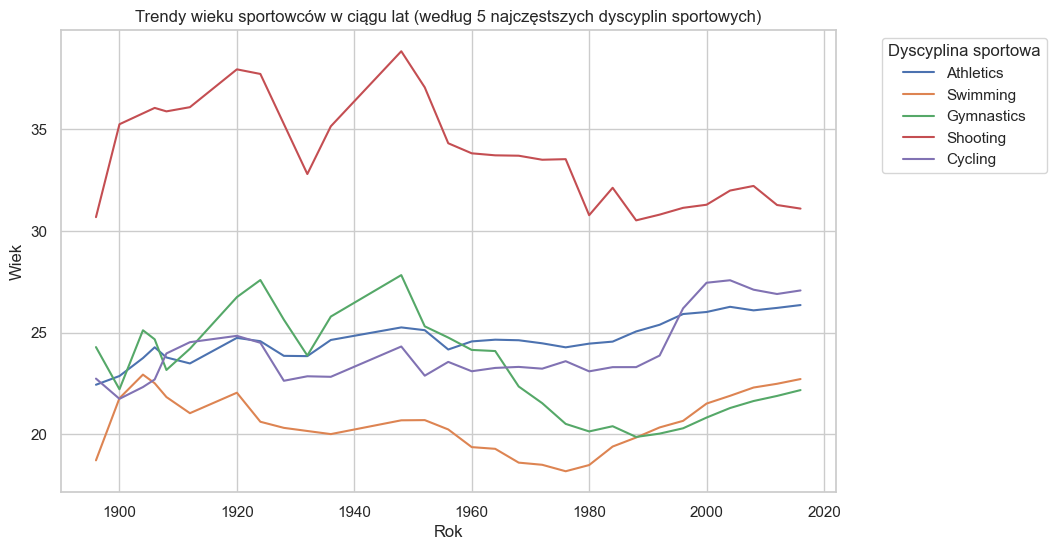

In [4]:
top_sports = df['Sport'].value_counts().index[:5] # Wybór 5 najczęściej występujących dyscyplin sportowych
df_filtered = df[df['Sport'].isin(top_sports)] # Filtrowanie danych do 5 najczęściej występujących dyscyplin sportowych

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) # Ustawienie wielkości wykresu

sns.lineplot(data=df_filtered, x='Year', y='Age', hue='Sport', errorbar=None)  # Podział na dyscypliny sportowe, hue - odpowiada za podział na serie danych, errorbar=None - wyłączenie słupków błędu(inna opcja to "sd")

plt.title('Trendy wieku sportowców w ciągu lat (według 5 najczęstszych dyscyplin sportowych)')
plt.xlabel('Rok')
plt.ylabel('Wiek')
plt.legend(title='Dyscyplina sportowa', bbox_to_anchor=(1.05, 1), loc='upper left') # Przesunięcie legendy obok wykresu

plt.show()

##### ⭐ Zadanie 3:

Przygotuj wykres liniowy (`relplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 serie danych, gdzie każda seria danych będzie przedstawiona na osobnym podwykresie (`subplot`) jednego obrazu. Zapoznaj się z parametrami `row` i `col` oraz dobierz dla nich właściwą wartość mając na uwadze wizualizację określonej liczby serii danych na osobnych podwykresach. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi i ewentualnie legenda). 

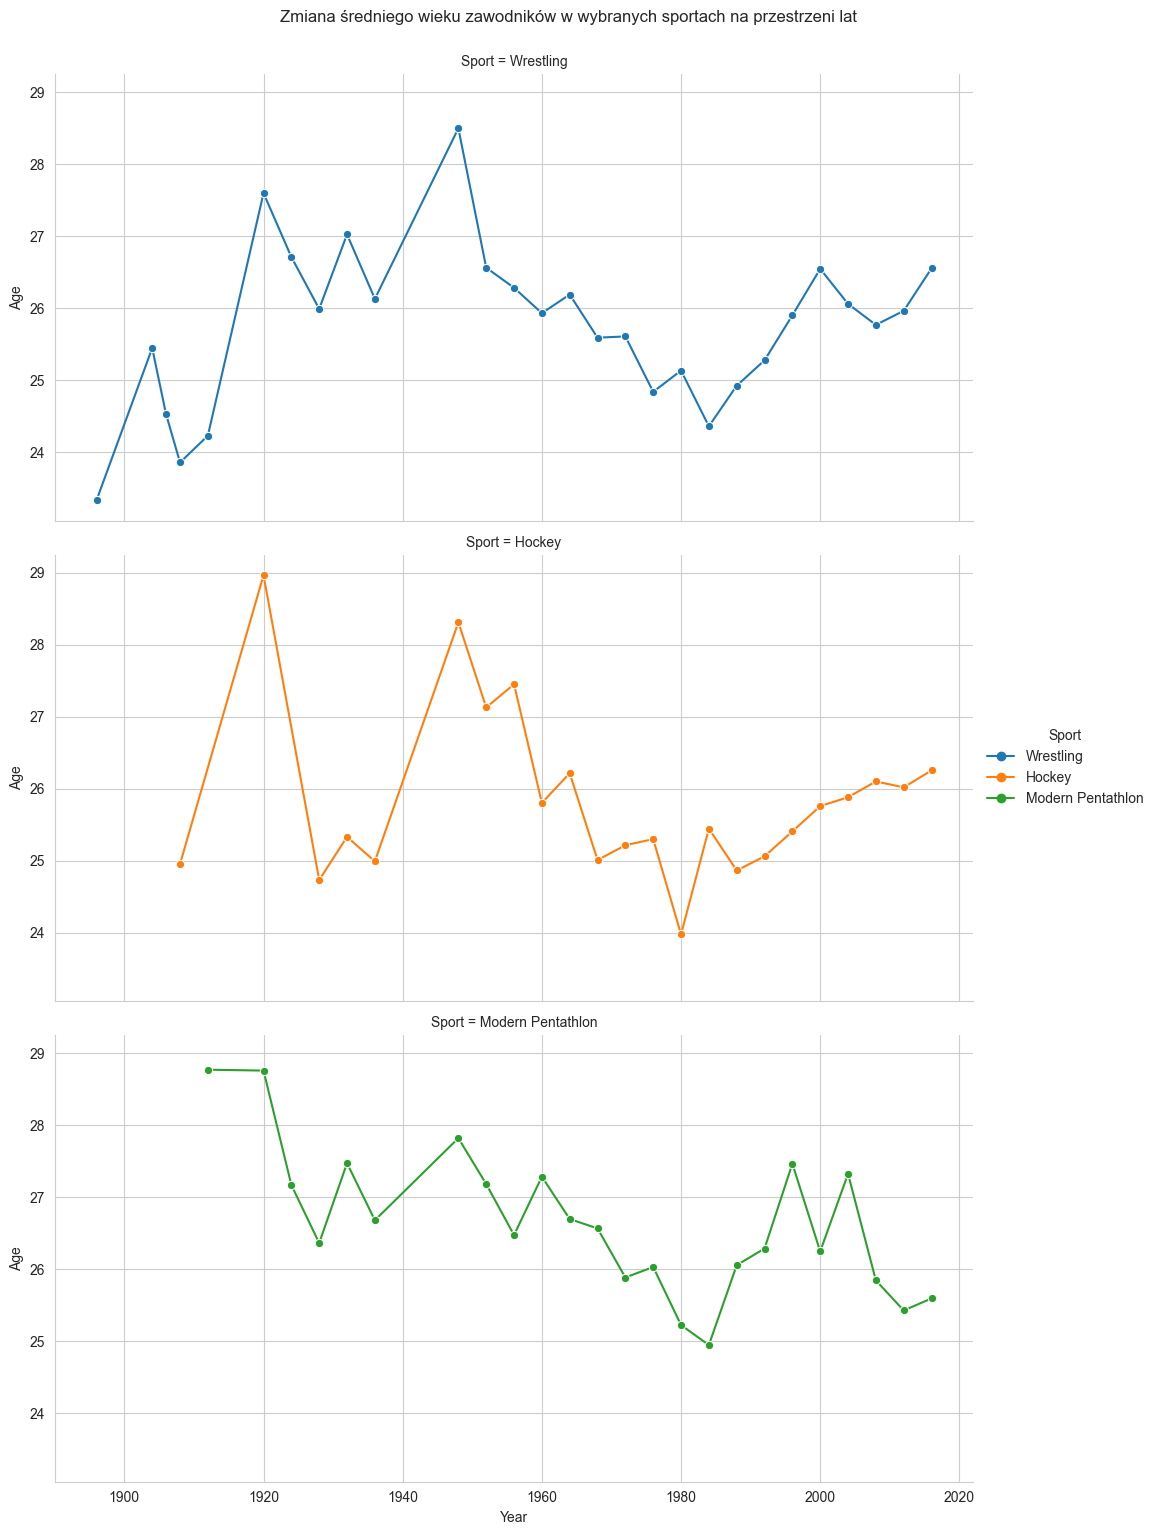

In [14]:
# Wybieramy konkretne sporty do analizy
selected_sports = ['Wrestling', 'Hockey', 'Modern Pentathlon']

# Tworzymy podzbiór danych zawierający tylko wybrane sporty
subset_df = df[df['Sport'].isin(selected_sports)]

# Obliczamy średni wiek zawodników dla każdego roku i sportu
avg_age_by_year_sport = subset_df.groupby(['Year', 'Sport'])['Age'].mean().reset_index()

# Tworzymy wykres używając relplot
sns.relplot(data=avg_age_by_year_sport, x='Year', y='Age', hue='Sport', kind='line', row='Sport', aspect=2, marker='o')

# Ustawiamy tytuł całego wykresu
plt.suptitle('Zmiana średniego wieku zawodników w wybranych sportach na przestrzeni lat', y=1.02)

# Pokazujemy wykres
plt.show()

##### ⭐ Zadanie 4:

Przygotuj wykres bąbelkowy (`relplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Wykorzystaj rozmiary i kolory markerów do zaprezentowania większej liczby informacji. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi i opis skali koloru). 

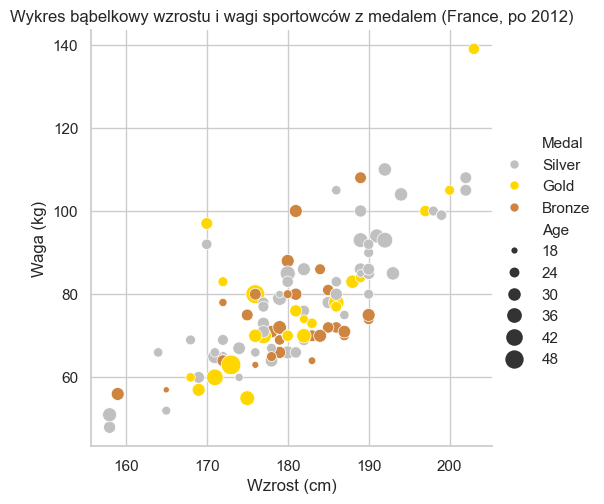

In [11]:
df_Medal = df.copy()
df_Medal = df_Medal[df_Medal['Medal'] != 'NA'] # Usuń wiersze z wartościami "NA" w kolumnie Medal
df_Medal = df_Medal.dropna(subset=['Height', 'Weight', 'Age']) # Usuń wiersze, w których brakuje danych dotyczących wzrostu, wagi lub wieku
df_france = df_Medal[df_Medal['Team'] == 'France'] # Ograniczenie tylko do rekordów z France
df_france_post_2012 = df_france[df_france['Year'] > 2012] # Ograniczenie wyników do po 2012 roku

# Wykres bąbelkowy
sns.relplot(x='Height', y='Weight', size='Age', hue='Medal', palette={'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'peru'}, sizes=(20, 200), data=df_france_post_2012) # size - rozmiar punktów na wykresie bedzie proporcjonalny do wieku, hue - grupowanie punktów na wykresie według medalu, palette - ustawienie kolorów dla poszczególnych medali, sizes - zakres rozmiarów punktów na wykresie

plt.title('Wykres bąbelkowy wzrostu i wagi sportowców z medalem (France, po 2012)')
plt.xlabel('Wzrost (cm)')
plt.ylabel('Waga (kg)')

plt.show()

--------------------
### Wykresy dystrybucji

Wykresy dystrybucji przedstawiają w jawny sposób rozkład danych. Funkcja `displot` znajduje się na poziomie *figure* (poziom wyższy) i korzysta z funkcji z poziomu *axes* (poziom niższy): `histplot`, `kdeplot`, `ecdfplot` oraz `rugplot`. Do wizualizacji danych można wykorzystywać wszystkie powyższe funkcje z odpowiednimi parametrami.

##### ⭐ Zadanie 5:

Przygotuj histogram (`displot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Zapoznaj się z parametrami `bins` i `binwidth` oraz dobierz dla nich takie wartości, które wg. Ciebie najlepiej wizualizują dane. Zadbaj o czytelność wykresu (tytuł wykresu oraz podpisy osi). 

<Figure size 1000x600 with 0 Axes>

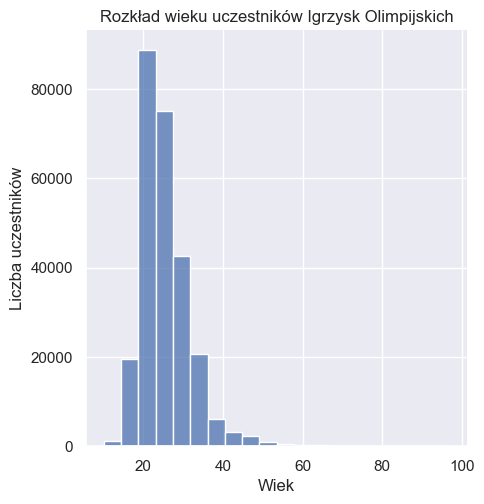

In [20]:
age_range = df['Age'].max() - df['Age'].min() # Obliczenie szerokości przedziału wieku
binwidth = age_range / 20  # Dzielę zakres wieku na 20 przedziałów

num_bins = int(age_range / binwidth) + 1 # Obliczenie liczby przedziałów na podstawie podanej szerokości przedziału 

plt.figure(figsize=(10, 6)) # Ustawienie wielkości wykresu
sns.displot(df['Age'], bins=num_bins, binwidth=binwidth) # bins - liczba przedziałów, binwidth - szerokość przedziału

plt.title('Rozkład wieku uczestników Igrzysk Olimpijskich')
plt.xlabel('Wiek')
plt.ylabel('Liczba uczestników')
plt.grid(True) # Dodanie siatki na wykresie

plt.show()

##### ⭐ Zadanie 6:

Przedstaw na wykresie dystrybucji (`displot`) jądrowy estymator gęstości (`kde`) oraz dystrybuantę empiryczną (`ecdf`) dla danych, które wg. Ciebie najlepiej pokażą ich zastosowanie. Każdy rodzaj wykresu dystrybucji musi być przedstawiony na osobnym podwykresie (`subplot`) jednego obrazu. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi i ewentualnie legenda). 

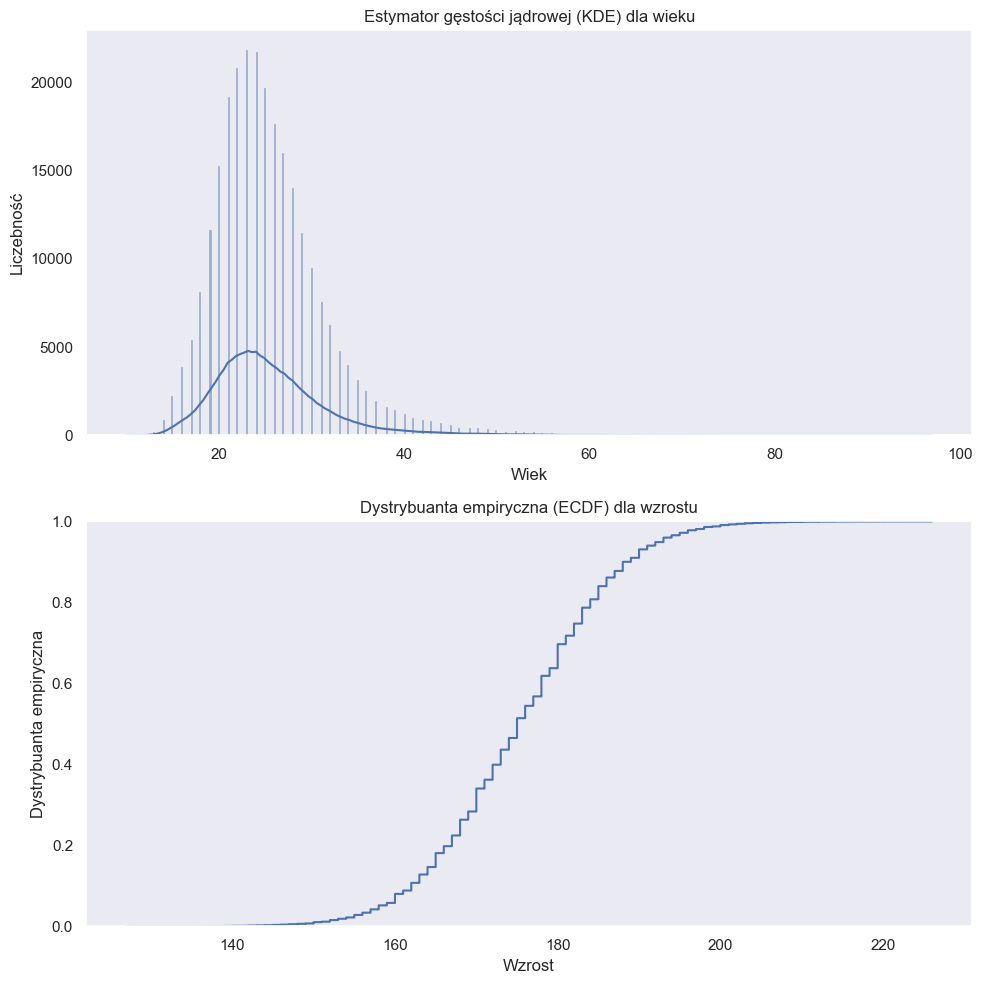

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10)) # Tworzenie dwóch subplotów (2 wiersze, 1 kolumna) o wielkości 10x10

# Wykres KDE dla wieku
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0]) # kde - wyświetlenie estymatora gęstości jądrowej
axes[0].set_title('Estymator gęstości jądrowej (KDE) dla wieku')
axes[0].set_xlabel('Wiek')
axes[0].set_ylabel('Liczebność')

# Wykres ECDF dla wzrostu
sns.ecdfplot(df['Height'].dropna(), ax=axes[1]) # ecdfplot - wyświetlenie dystrybuanty empirycznej (ECDF) 
axes[1].set_title('Dystrybuanta empiryczna (ECDF) dla wzrostu')
axes[1].set_xlabel('Wzrost')
axes[1].set_ylabel('Dystrybuanta empiryczna')

plt.tight_layout()
plt.show()

##### ⭐ Zadanie 7:

Przygotuj dwuwymiarowy histogram (`displot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi oraz legenda). 

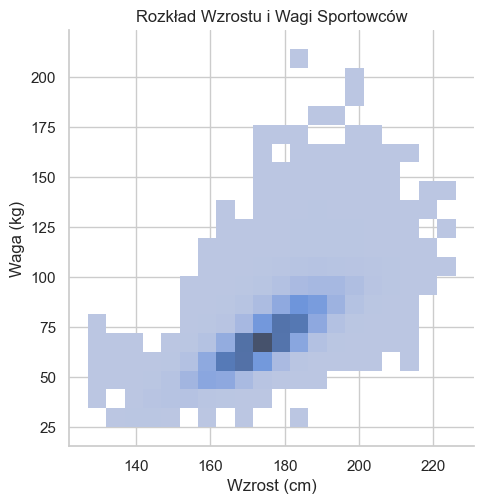

In [9]:
df_displot = df.copy()
df_displot = df_displot.dropna(subset=['Height', 'Weight']) # Usuń wiersze, w których brakuje danych dotyczących wzrostu lub wagi

sns.displot(data=df_displot, x="Height", y="Weight", kind="hist", bins=20) # kind - wybór rodzaju wykresu (hist - histogram), bins - liczba przedziałów, na które zostanie podzielony wykres

plt.title('Rozkład Wzrostu i Wagi Sportowców')
plt.xlabel('Wzrost (cm)')
plt.ylabel('Waga (kg)')

plt.show()

--------------------
### Wykresy dystrybucji +

Podstawowe typy wykresów dystrybucji mogą być dodatkowo rozszerzone o więcej informacji. Wizualizacja zależności 2 zmiennych może przedstawiać na marginesach wizualizacje rozkładu każdej zmiennej osobno. Przy wybraniu większej liczby zmiennych, możliwe jest wygenerowanie wszystkich kombinacji pomiędzy nimi. Służą do tego funkcje `jointplot` i `pairplot`, które znajdują się na poziomie *figure*.

##### ⭐ Zadanie 8:

Przygotuj wykres punktowy z rozkładem gęstości na osiach marginalnych (`jointplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 serie danych. Zapoznaj się z obiektem `plot_joint` i narysuj dodatkowo rozkład gęstości wartości na głównym wykresie punktowym. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi oraz legenda). 

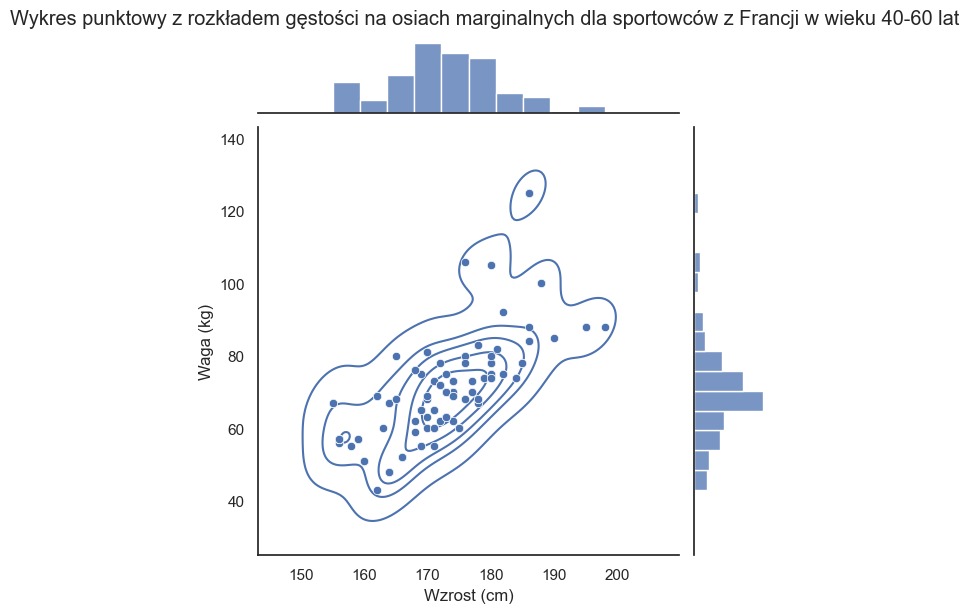

In [13]:
df_subset = df.copy()
df_france = df_subset[df_subset['Team'] == 'France'][['Age', 'Height', 'Weight']].dropna()
df_france = df_france[(df_france['Age'] >= 40) & (df_france['Age'] <= 60)] # Ograniczenie do zawodników w wieku 40-60 lat

sns.set(style="white", color_codes=True) # Ustawienie stylu wykresu
g = sns.jointplot(x="Height", y="Weight", data=df_france, kind="scatter") # jointplot - wykres punktowy, kind - rodzaj wykresu (scatter - wykres punktowy)

g.plot_joint(sns.kdeplot, zorder=0, levels=6) # plot_joint - wyświetlenie rozkładu gęstości wartości na głównym wykresie punktowym, zorder - ustawienie kolejności wyświetlania wykresów, levels - liczba poziomów konturów, kdeplot - wykres gęstości wartości

# Ustawienie tytułu na samej górze
plt.suptitle('Wykres punktowy z rozkładem gęstości na osiach marginalnych dla sportowców z Francji w wieku 40-60 lat', y=1.02)

# Ustawienie podpisów osi
g.set_axis_labels("Wzrost (cm)", "Waga (kg)")

# Wyświetlenie wykresu
plt.show()

##### ⭐ Zadanie 9:

Przygotuj wykres punktowy (`pairplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 serie danych. Zapoznaj się z parametrem `markers` i dobierz dla każdej serii danych inny symbol. Zapoznaj się z parametrem `diag_kind` i ustaw histogram dla wszystkich wykresów na przekątnej. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi oraz legenda). 

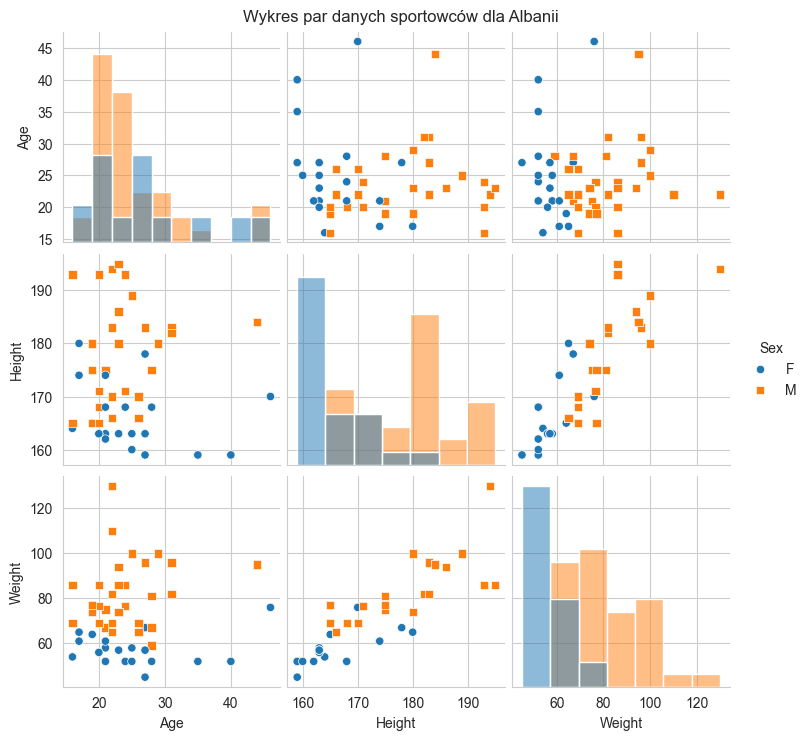

In [65]:
df_subset = df[['Age', 'Height', 'Weight', 'Sex', 'NOC']] # Wybierz kolumny Age, Height, Weight

df_subset_filtered = df_subset[(df_subset['NOC'] == 'ALB')] # Ograniczenie do sportowców z Albanii

sns.pairplot(df_subset_filtered, hue='Sex', markers=["o", "s"], diag_kind='hist') # pairplot - wykres punktowy, hue - podział na serie danych, markers - ustawienie symboli dla poszczególnych serii danych, diag_kind - rodzaj wykresu na przekątnej (hist - histogram)

plt.suptitle('Wykres par danych sportowców dla Albanii')
plt.subplots_adjust(top=0.95)
plt.show()

--------------------
### Wykresy kategorialne

Wykresy kategorialne przedstawiają dane podzielone na kategorie. Funkcja `catplot` znajduje się na poziomie *figure* (poziom wyższy) i korzysta z funkcji z poziomu *axes* (poziom niższy): `stripplot`, `swarmplot`, `boxplot`, `violinplot`, `pointplot` oraz `barplot`. Do wizualizacji danych można wykorzystywać wszystkie powyższe funkcje z odpowiednimi parametrami.

##### ⭐ Zadanie 10: 

Przygotuj wykres punktowy (`catplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 kategorie i co najmniej 2 serie danych. Zapoznaj się z dwiema metodami rysowania wykresów punktowych kategorialnych (`strip`, `swarm`) i zdecyduj, która będzie lepsza w twoim rozwiązaniu. Zapoznaj się z parametrem `order` i dobierz dla niego takie wartości, żeby na osi X etykiety były pokazane w kolejności innej niż domyślna. Zadbaj o czytelność wykresu (tytuł wykresu i podpisy osi). 

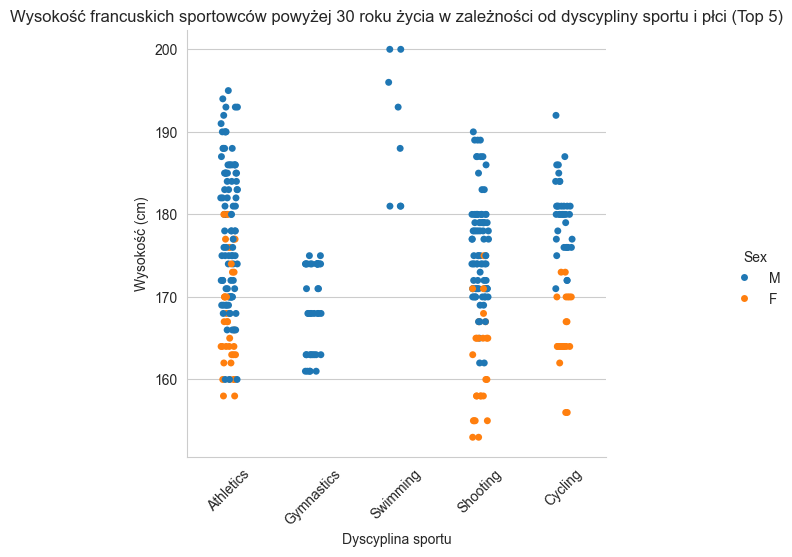

In [33]:
sport_counts = df['Sport'].value_counts() # Oblicz liczbę wystąpień każdej dyscypliny sportowej

top_sports = sport_counts.head(5).index # Wybierz 5 najczęściej występujących dyscyplin sportowych

df_filtered = df[['Sex', 'Sport', 'Height', 'Age', 'Weight', 'Team']].dropna() # Usuń wiersze z brakującymi danymi

df_filtered = df_filtered[df_filtered['Sport'].isin(top_sports) & (df_filtered['Team'] == 'France') & (df_filtered['Age'] > 30)] # Ograniczenie do sportowców z Francji, powyżej 30 roku życia i do 5 najczęściej występujących dyscyplin sportowych

sport_order = top_sports # Ustawienie kolejności wyświetlania dyscyplin sportowych

sns.catplot(x='Sport', y='Height', hue='Sex', data=df_filtered, kind='strip', order=sport_order) # kind - rodzaj wykresu (strip - wykres punktowy), order - kolejność wyświetlania dyscyplin sportowych, swarm - wykres punktowy z rozłożeniem punktów wzdłuż osi x
plt.xticks(rotation=45)  # Obróć etykiety na osi X dla czytelności
plt.title('Wysokość francuskich sportowców powyżej 30 roku życia w zależności od dyscypliny sportu i płci (Top 5)')
plt.xlabel('Dyscyplina sportu')
plt.ylabel('Wysokość (cm)')
plt.show()

##### ⭐ Zadanie 11:

Przygotuj wykres pudełkowy (`catplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 kategorie oraz co najmniej 2 serie danych. Zapoznaj się z dwiema metodami rysowania wykresów pudełkowych kategorialnych (`box`, `boxen`) i zdecyduj, która będzie lepsza w twoim rozwiązaniu. Zadbaj o czytelność wykresu (tytuł wykresu i podpisy osi). 

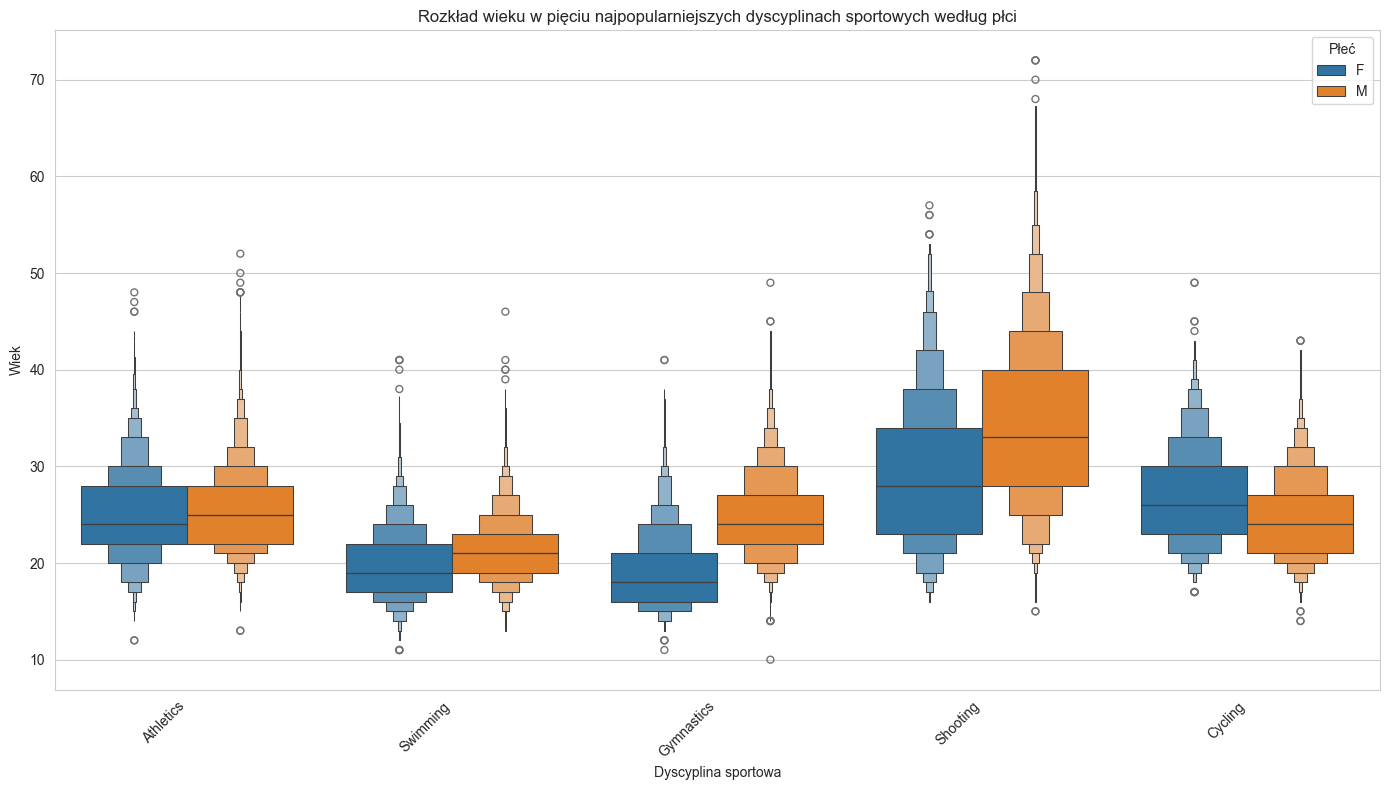

In [37]:
df_medals = df.dropna(subset=['Medal']) # Usuń wiersze z brakującymi danymi w kolumnie Medal

popular_sports = df_medals['Sport'].value_counts().head(5).index # Wybierz 5 najczęściej występujących dyscyplin sportowych

df_popular_sports = df_medals[df_medals['Sport'].isin(popular_sports)] # Ograniczenie do 5 najczęściej występujących dyscyplin sportowych

plt.figure(figsize=(14, 8)) # Ustawienie wielkości wykresu
sns.boxenplot(x='Sport', y='Age', hue='Sex', data=df_popular_sports) # kind - rodzaj wykresu (box - wykres pudełkowy), boxen - wykres pudełkowy z większą ilością kwantyli
# sns.boxplot(x='Sport', y='Age', hue='Sex', data=df_popular_sports)

plt.title('Rozkład wieku w pięciu najpopularniejszych dyscyplinach sportowych według płci')
plt.xlabel('Dyscyplina sportowa')
plt.ylabel('Wiek')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Płeć')
plt.tight_layout()
plt.show()

##### ⭐ Zadanie 12:

Przygotuj wykres kolumnowy (`catplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 kategorie oraz co najmniej 2 serie danych. Zapoznaj się z parametrem `palette` i dobierz dla niego nową wartość. Zadbaj o czytelność wykresu (tytuł wykresu i podpisy osi). 

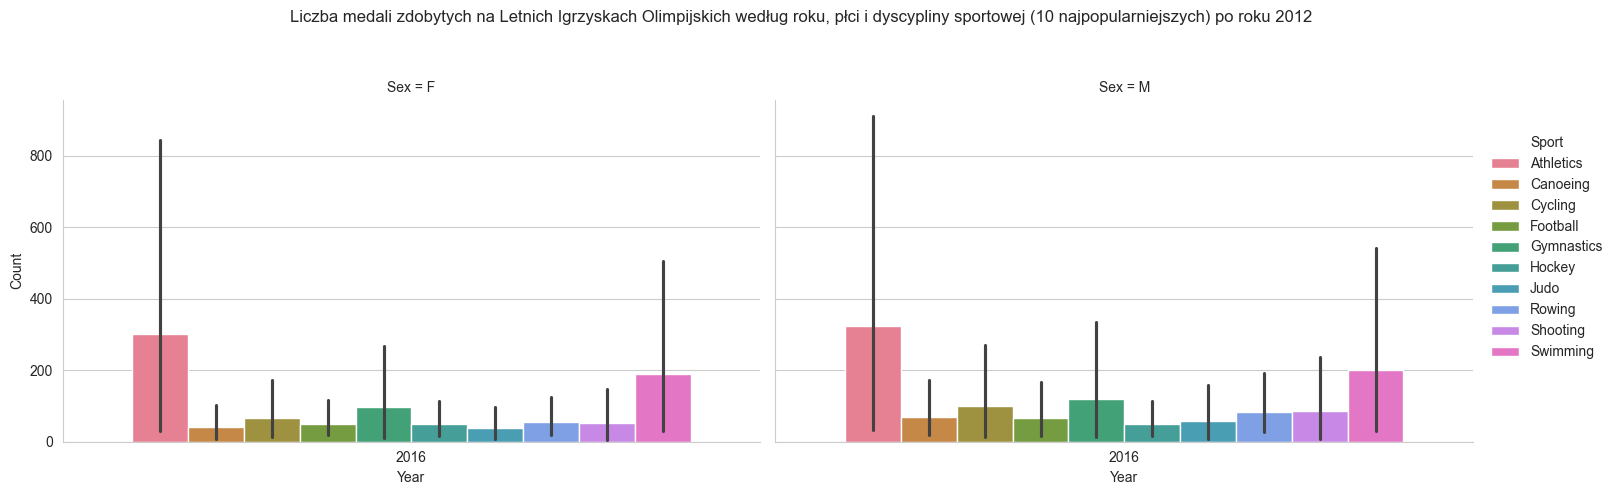

In [42]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['Medal'])
df_copy = df_copy[['Year', 'Sport', 'Sex', 'Medal', 'Season']]

df_copy = df_copy[(df_copy['Season'] == 'Summer') & (df_copy['Year'] > 2012)] # Filtracja tylko letnich igrzysk olimpijskich i lat po 2012

top_sports = df_copy.groupby('Sport')['Medal'].count().nlargest(10).index # Wybór 10 najpopularniejszych dyscyplin sportowych

df_copy = df_copy[df_copy['Sport'].isin(top_sports)] # Filtracja danych tylko dla 10 najpopularniejszych dyscyplin

df_grouped = df_copy.groupby(['Year', 'Sport', 'Sex', 'Medal']).size().reset_index(name='Count') # Grupowanie danych po roku, dyscyplinie sportowej i płci, a następnie zliczanie medali

sns.catplot(x='Year', y='Count', hue='Sport', col='Sex', kind='bar', data=df_grouped, palette='husl', height=5, aspect=1.5) # kind - rodzaj wykresu (bar - wykres kolumnowy), palette - paleta kolorów(inna np. muted), height - wysokość wykresu, aspect - proporcje wykresu

plt.subplots_adjust(top=0.8)
plt.suptitle('Liczba medali zdobytych na Letnich Igrzyskach Olimpijskich według roku, płci i dyscypliny sportowej (10 najpopularniejszych) po roku 2012')
plt.show()

##### ⭐ Zadanie 13:

Przygotuj wykres kolumnowy (`catplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 kategorie oraz co najmniej 2 serie danych. Porównaj ze sobą cztery rodzaje słupków błędu: błąd standardowy (`se` - standard error), odchylenie standardowe (`sd` - standard deviation), przedział centylowy (`pi` - percentile interval) i przedział ufności (`ci` - confidence interval). Każdy rodzaj słupków błędu musi być przedstawiony na osobnym podwykresie (`subplot`) jednego obrazu. Zadbaj o czytelność wykresu (tytuł wykresu i podpisy osi). 

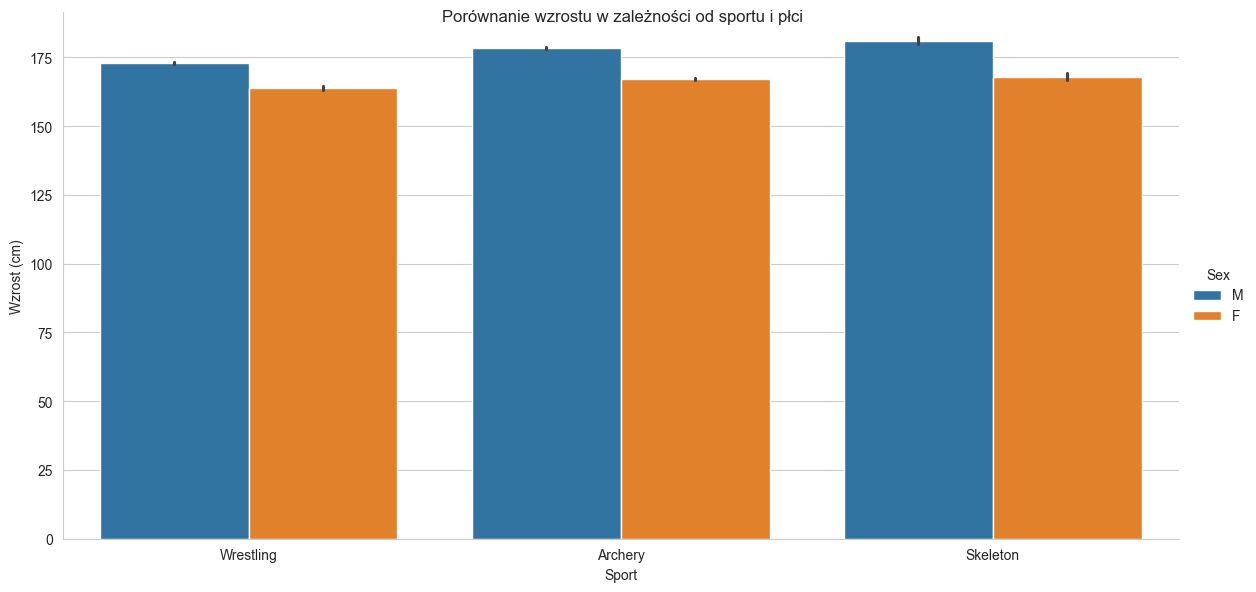

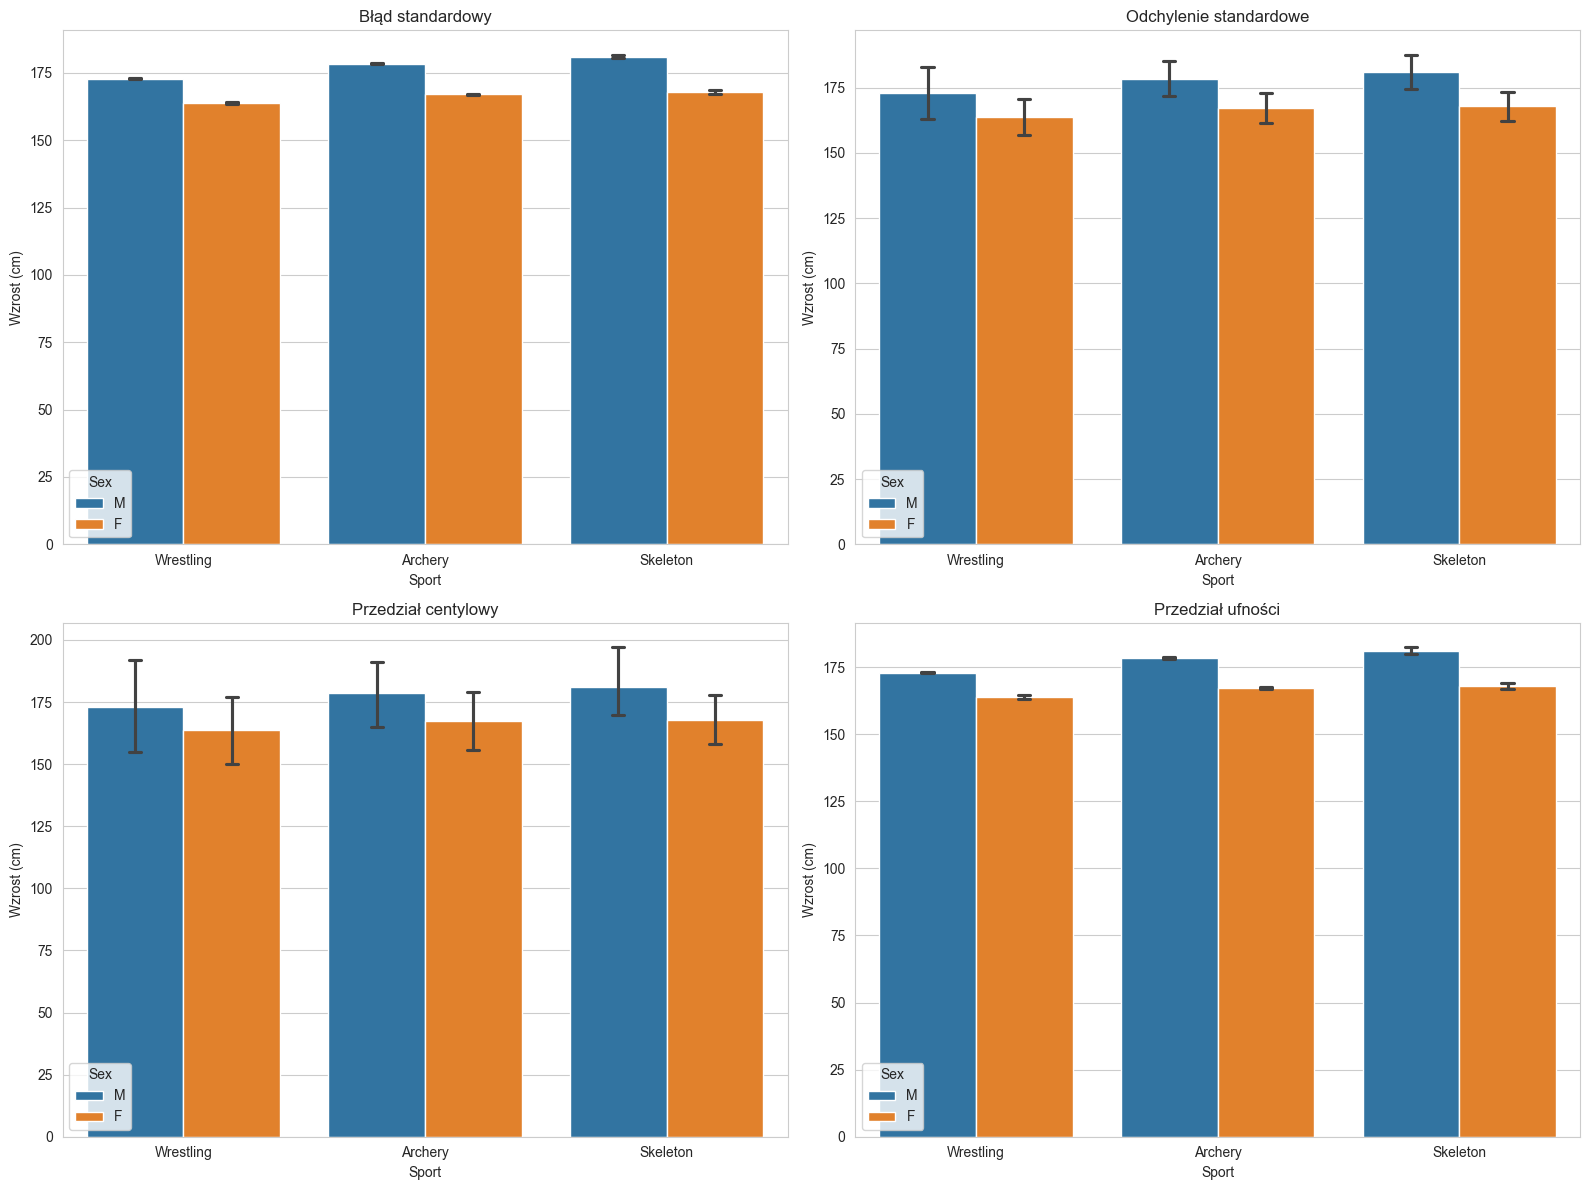

In [52]:
selected_data = df[['Height', 'Sex', 'Sport']].dropna()  # Wybieramy kolumny 'Height', 'Sex' i 'Sport', usuwając brakujące dane

selected_sports = ['Skeleton', 'Wrestling', 'Archery'] # Wybieramy 3 dyscypliny sportowe do analizy

selected_data = selected_data[selected_data['Sport'].isin(selected_sports)] # Ograniczamy dane do wybranych sportów

g = sns.catplot(x="Sport", y="Height", hue="Sex", kind="bar", data=selected_data, height=6, aspect=2) # Tworzymy wykres kolumnowy (catplot) z podziałem na płeć i dyscyplinę sportową (kind="bar") o wysokości 6 i proporcjach 2

g.fig.suptitle('Porównanie wzrostu w zależności od sportu i płci')
g.set_axis_labels("Sport", "Wzrost (cm)")

fig, axs = plt.subplots(2, 2, figsize=(16, 12)) # Tworzymy 4 podwykresy (2 wiersze, 2 kolumny) o wielkości 16x12

# Błąd standardowy
sns.barplot(x="Sport", y="Height", hue="Sex", data=selected_data, ax=axs[0, 0], capsize=0.1, errorbar='se') # capsize - szerokość słupka błędu, errorbar - rodzaj słupka błędu (se - błąd standardowy)
axs[0, 0].set_title("Błąd standardowy")
axs[0, 0].set_xlabel("Sport")
axs[0, 0].set_ylabel("Wzrost (cm)")

# Odchylenie standardowe
sns.barplot(x="Sport", y="Height", hue="Sex", data=selected_data, ax=axs[0, 1], capsize=0.1, errorbar='sd') # errorbar - rodzaj słupka błędu (sd - odchylenie standardowe) 
axs[0, 1].set_title("Odchylenie standardowe")
axs[0, 1].set_xlabel("Sport")
axs[0, 1].set_ylabel("Wzrost (cm)")

# Przedział centylowy
sns.barplot(x="Sport", y="Height", hue="Sex", data=selected_data, ax=axs[1, 0], capsize=0.1, errorbar='pi') # errorbar - rodzaj słupka błędu (pi - przedział centylowy)
axs[1, 0].set_title("Przedział centylowy")
axs[1, 0].set_xlabel("Sport")
axs[1, 0].set_ylabel("Wzrost (cm)")

# Przedział ufności
sns.barplot(x="Sport", y="Height", hue="Sex", data=selected_data, ax=axs[1, 1], capsize=0.1, errorbar='ci') # errorbar - rodzaj słupka błędu (ci - przedział ufności)
axs[1, 1].set_title("Przedział ufności")
axs[1, 1].set_xlabel("Sport")
axs[1, 1].set_ylabel("Wzrost (cm)")

plt.tight_layout()
plt.show()